# Cats vs Dogs 

*The training archive contains 25,000 images of dogs and cats. We will train our model on these files and predict the labels for test1.zip (1 = dog, 0 = cat).*

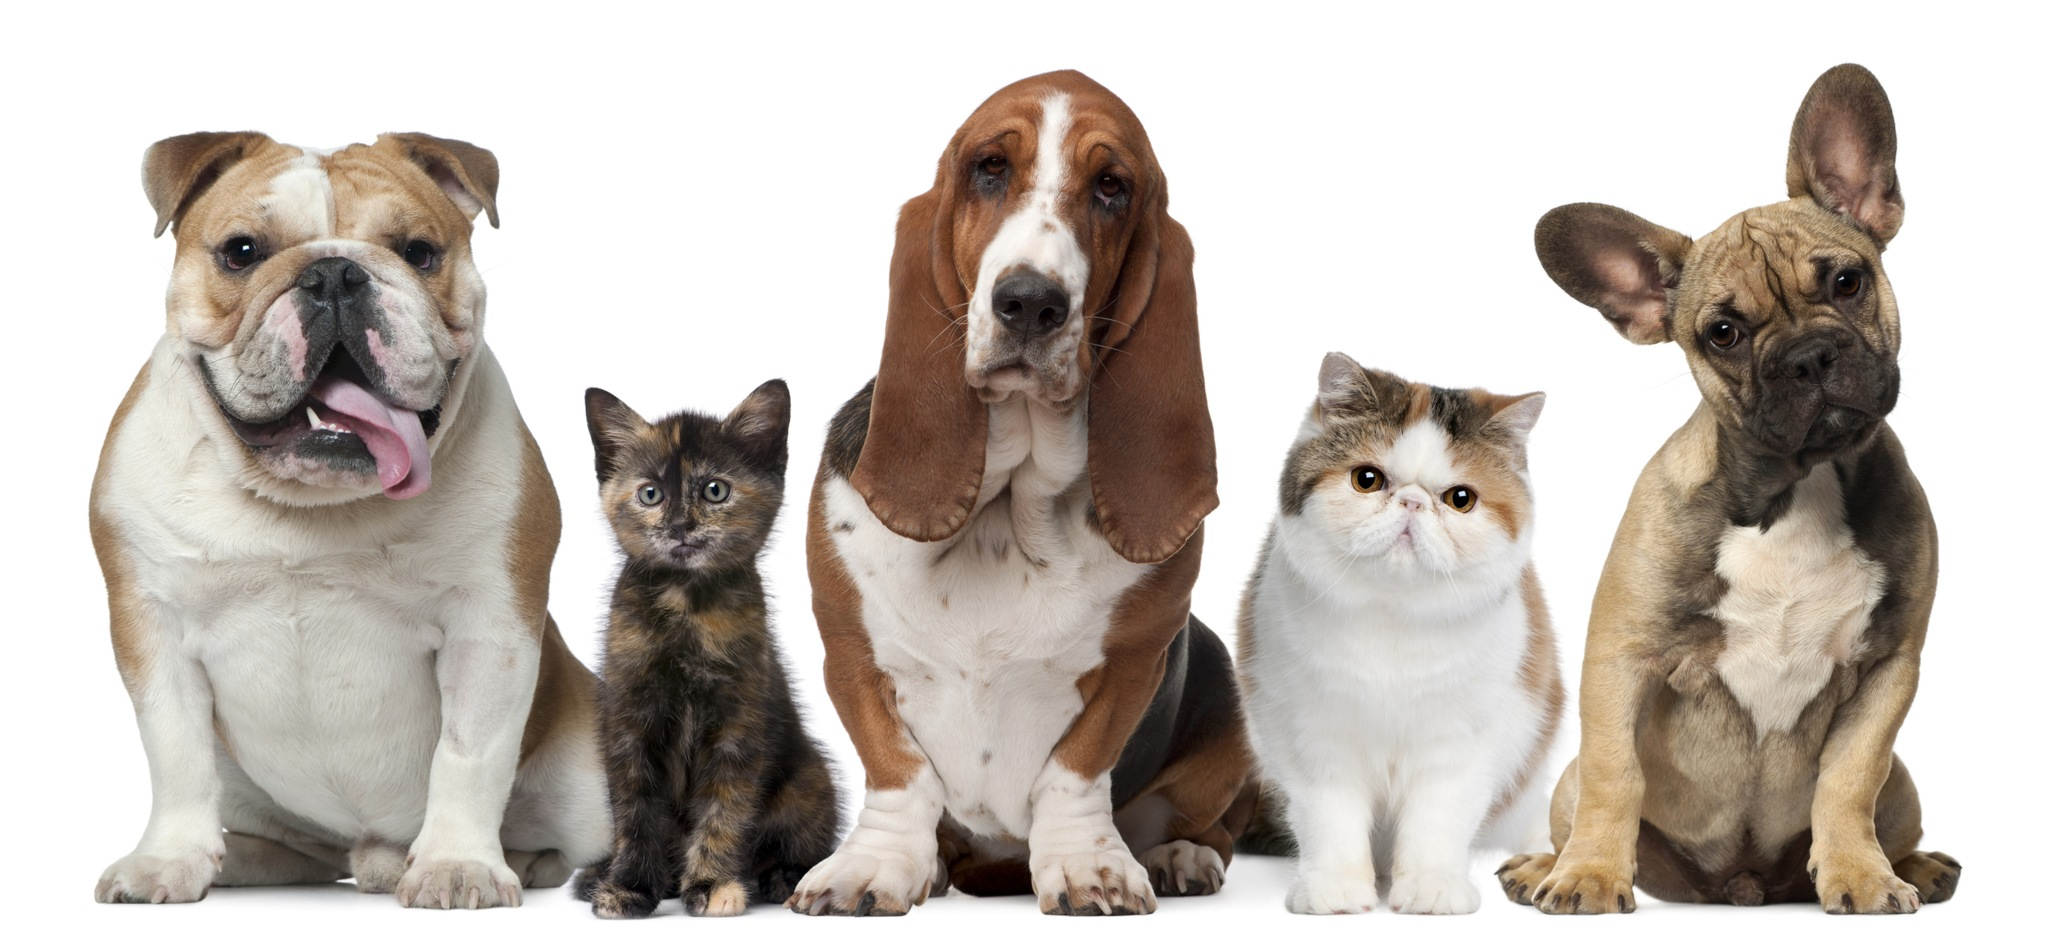

In [31]:
import cv2
import pandas as pd
import numpy as np
import os               
from random import shuffle
from tqdm import tqdm 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import os
import random
import seaborn as sns
import cv2
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import VotingClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.manifold import TSNE

In [2]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


**Lets resize all of our pictures and turn them into A dataset.**

In [3]:
TRAIN_DIRECTORY= r'C:\Users\yasmi\OneDrive\Desktop\dogs-vs-cats\train\train' 
PIC_SIZE = 50
LR = 1e-3

MODEL_NAME = 'dogsvscats-{}-{}.model'.format(LR, '2conv-basic')

In [4]:
def label_img(img):
    word_label = img.split('.')[-3]
   
    if word_label == 'cat': return 1
    #                             
    elif word_label == 'dog': return 0

In [5]:
named_data =[]
training_data = []
for img in tqdm(os.listdir(TRAIN_DIRECTORY)):
        name = label_img(img)
        path = os.path.join(TRAIN_DIRECTORY,img)
        pic = cv2.imread(path, cv2.COLOR_BGR2RGB)
        pic = cv2.resize(pic, (PIC_SIZE,PIC_SIZE))
        training_data.append(pd.Series(pic.flatten()))
        named_data.append(name)

100%|██████████| 25000/25000 [02:29<00:00, 167.29it/s]


In [6]:
images_df = pd.DataFrame(training_data)
labels_df = pd.DataFrame(named_data, columns = ['labels'])

In [7]:
df = pd.concat([images_df, labels_df], axis=1)

# Understanding our data

In [48]:
df

,0,1,2,3,4,5,6,7,8,9,...,7492,7493,7494,7495,7496,7497,7498,7499,labels,Y
0,92,169,208,100,177,216,104,182,225,110,...,2,2,0,2,2,0,2,2,1,1
1,42,43,39,64,58,55,36,40,35,44,...,52,70,52,57,75,20,26,39,1,1
2,53,45,38,61,47,41,64,54,47,69,...,152,164,2,183,185,10,183,187,1,1
3,217,222,221,220,225,224,237,235,235,239,...,211,210,218,220,220,207,212,215,1,1
4,72,109,137,83,120,148,48,87,115,90,...,105,120,59,91,102,66,90,102,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,107,144,148,110,147,151,113,150,154,114,...,168,178,134,169,179,135,170,180,0,0
24996,53,81,111,63,89,113,44,76,95,43,...,76,99,66,97,118,37,64,85,0,0
24997,45,48,53,50,53,58,51,53,54,41,...,175,213,28,76,116,128,172,215,0,0
24998,253,253,253,229,230,253,175,189,235,91,...,99,112,97,95,111,107,107,122,0,0


In [49]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,7492,7493,7494,7495,7496,7497,7498,7499,labels,Y
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,...,25000.000000,25000.000000,25000.000000,25000.000000,25000.00000,25000.000000,25000.000000,25000.00000,25000.00000,25000.00000
mean,105.637920,113.795720,118.186360,106.115840,114.385080,118.906200,106.673560,115.168040,119.755880,107.202040,...,121.377880,127.927840,112.018560,120.324880,126.72572,111.297480,119.383840,125.65276,0.50000,0.50000
std,71.960065,70.476819,70.933098,71.774213,70.203541,70.728607,71.564416,70.005545,70.515969,71.676186,...,66.785812,68.321448,68.860044,66.968752,68.54405,69.144785,67.282821,68.69772,0.50001,0.50001
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,0.00000
25%,45.000000,55.000000,59.000000,45.000000,55.000000,60.000000,46.000000,56.000000,61.000000,47.000000,...,68.000000,74.000000,56.000000,67.000000,72.00000,54.000000,66.000000,71.00000,0.00000,0.00000
50%,96.000000,108.000000,114.000000,96.000000,109.000000,115.000000,97.000000,110.000000,117.000000,98.000000,...,120.000000,128.000000,106.000000,118.000000,126.00000,104.000000,117.000000,124.00000,0.50000,0.50000
75%,157.000000,165.000000,172.000000,158.000000,166.000000,172.000000,159.000000,167.000000,173.000000,160.000000,...,170.000000,180.000000,162.000000,169.000000,178.00000,161.000000,168.000000,177.00000,1.00000,1.00000
max,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.00000,255.000000,255.000000,255.00000,1.00000,1.00000


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Columns: 7502 entries, 0 to Y
dtypes: int64(2), uint8(7500)
memory usage: 179.2 MB


# Data preprocessing

In [8]:
X = df.drop(['labels'],axis=1)
Y = df['labels']

In [9]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.3, random_state=120)
print("Xtrain : ",Xtrain.shape)
print("Xtest : ",Xtest.shape)
print("Ytrain : ",Ytrain.shape)
print("Ytest : ",Ytest.shape)

Xtrain :  (17500, 7500)
Xtest :  (7500, 7500)
Ytrain :  (17500,)
Ytest :  (7500,)


In [27]:
scale_pipeline = Pipeline([
 ("std_scaler", StandardScaler()),
 ("pca", PCA(n_components=0.90, random_state=0,svd_solver='full')),
])
Xtrain= scale_pipeline.fit_transform(Xtrain)
Xtest= scale_pipeline.transform(Xtest)

# Logistic Regression Model

In [41]:
log_reg = LogisticRegression(random_state=42,solver='liblinear',n_jobs=-1)
log_reg.fit(Xtrain,Ytrain)
log_reg.score(Xtest,Ytest)

0.6126666666666667

# KNN

*Training the KNN model*

In [42]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(Xtrain,Ytrain)
acc = model.score(Xtest,Ytest)
print("Raw pixel accuracy: {:.2f}%".format(acc * 100))

Raw pixel accuracy: 59.00%


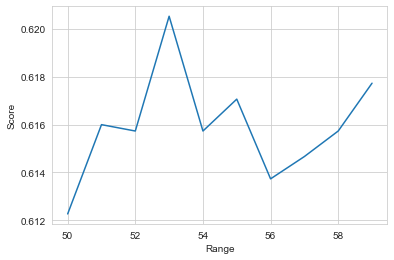

In [43]:
score_array = []
for each in range(50,60):
    knn_loop = KNeighborsClassifier(n_neighbors = each)
    knn_loop.fit(Xtrain,Ytrain)
    score_array.append(knn_loop.score(Xtest,Ytest))
    
plt.plot(range(50,60),score_array)
plt.xlabel("Range")
plt.ylabel("Score")
plt.show()

# Ensamble Learning with XGBoost

In [44]:
xg_boost = XGBClassifier(subsample=1 ,n_estimators = 150,min_child_weight=5,max_depth=3,learning_rate=0.2, gamma=2, n_jobs = -1,colsample_bytree=1)
xg_boost.fit(Xtrain,Ytrain)
xg_boost.score(Xtest,Ytest)

0.6522666666666667

In [50]:
report = classification_report(Ytest,xg_boost.predict(Xtest))
print(report)

              precision    recall  f1-score   support

           0       0.65      0.64      0.65      3724
           1       0.65      0.66      0.66      3776

    accuracy                           0.65      7500
   macro avg       0.65      0.65      0.65      7500
weighted avg       0.65      0.65      0.65      7500

